# Term Deposit Subscription Prediction


## Problem statement (Term Deposit Sale)

We have data from a Portuguese bank on details of customers related to selling a term deposit. The objective of the project is to help the marketing team identify potential customers who are relatively more likely to subscribe to the term deposit and this increase the hit ratio.


## What is a Term Deposit?
A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

 

## Resources Available

The historical data for this project is available in file https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
 

## Note : 
- Use random_state=7 (wherever the parameter can be used) so that we can compare all submissions.

- Provide comments in the solution notebook regarding the steps you take and also provide insights drawn from the plots. - **5 Marks**

- Marks distribution for Students with recall_score (pos_label = ‘yes’) on the test set:
    - Above 43% - **5 Marks**

    - Between 40% to 43% - **4 Marks**

    - Less than 40% - **3 Marks**


- Make sure you are not overfitting the model in order to increase the recall score only.

 

## Attribute Information

1. age
1. job : type of job
1. marital : marital status
1. education
1. default: has credit in default?
1. balance in account
1. housing: has housing loan?
1. loan: has personal loan?
1. contact: contact communication type
1. day: last contact day of the month
1. month: last contact month of year
1. duration: last contact duration, in seconds
1. campaign: number of contacts performed during this campaign and for this client
1. pdays: number of days that passed by after the client was last contacted from a previous campaign
1. previous: number of contacts performed before this campaign and for this client
1. poutcome: outcome of the previous marketing campaign
1. Output variable ('Target'): has the client subscribed a term deposit?



### Import Libraries and Dataset

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree

data = pd.read_csv("bank-full.csv")

## 0. Initial EDA

In [19]:
data.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,8,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,8,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,8,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,8,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,8,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


In [7]:
data.shape

(45211, 17)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## 1. Exploratory data analysis - 15 marks

### 1a. Univariate analysis - 9 marks
#### Data types and description of the independent attributes which should include (name,  range of values observed, central values (mean and median), standard deviation and quartiles, skewness). - **3 Marks**

In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [78]:
data.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

### Insights: 

- balance, duration, campaign, pdays, previous
    - These columns had a positive skewness, meaning that mean > median
- age, day
    - These columns had zero skewness or symmetrical distribution, meaning that mean = median

#### Make a function to plot ‘countplot’ if the variable is categorical and ‘distplot’ if the variable is numeric. - **3 Marks**

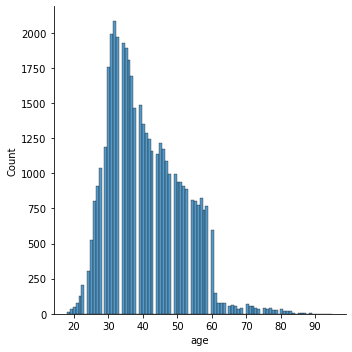

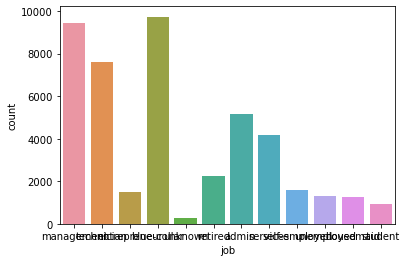

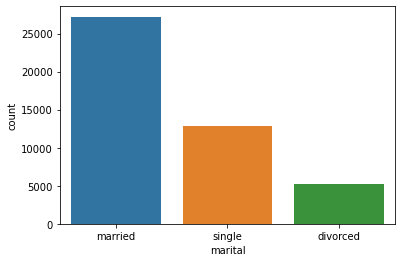

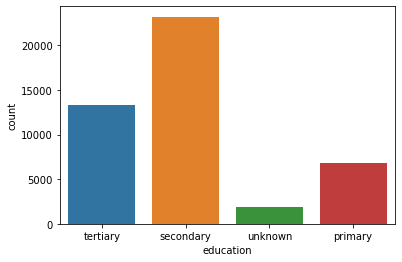

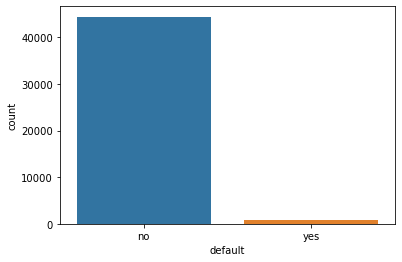

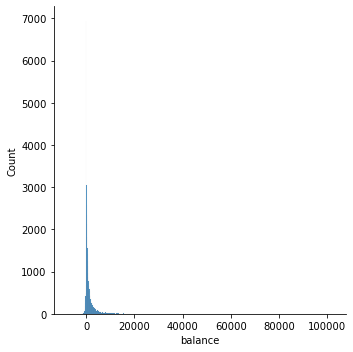

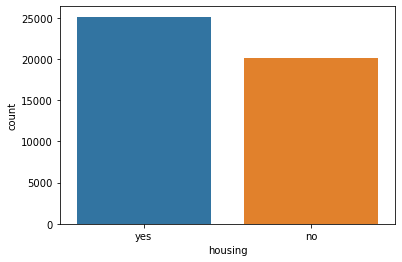

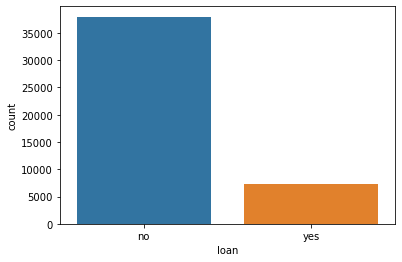

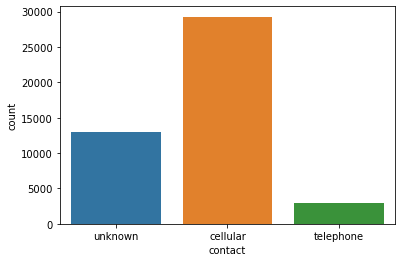

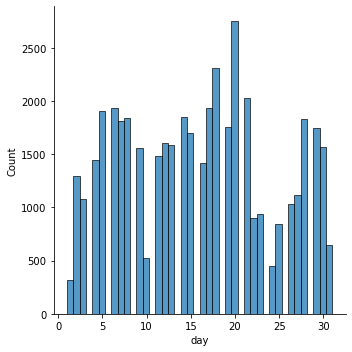

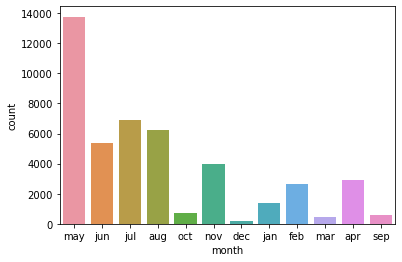

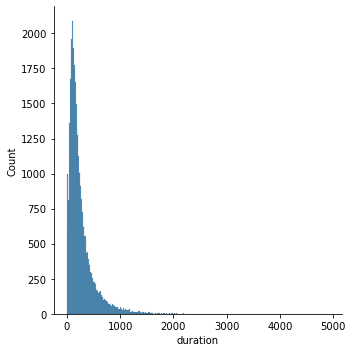

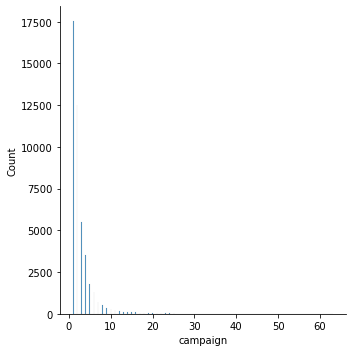

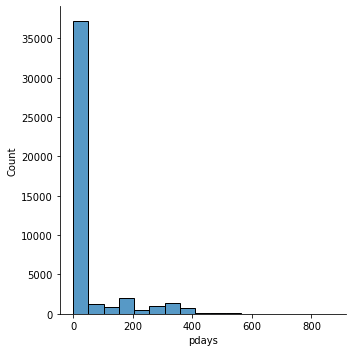

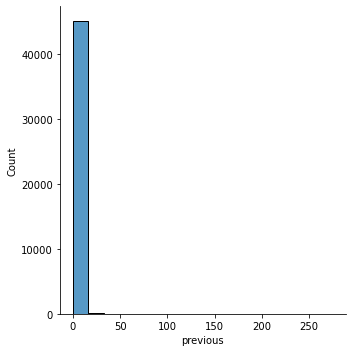

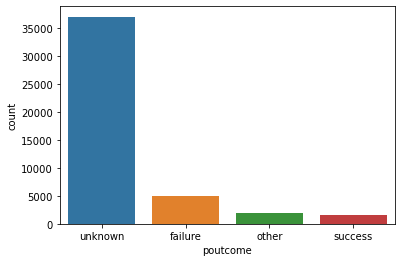

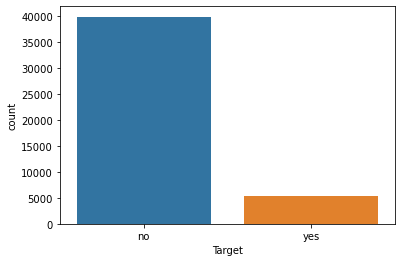

In [245]:
def uvanalysis(df):
    for col in df.columns: 
        if df[col].dtype == 'object':
            sns.countplot(x=df[col], data=df)
            plt.show()
        elif df[col].dtype == 'int64':
            sns.displot(df[col])
            plt.show()
        
uvanalysis(data)

#### Identify outliers using IQR and verify the same using plots. Also mention the percentage of data points which are considered outliers. Should we treat them, why or why not? - **3 Marks**

In [249]:
print('IQR Outliers')
for col in data.columns:
    if data[col].dtype == 'int64':
        print(data[col].name,':', data[col].quantile(0.75) - data[col].quantile(0.25))

IQR Outliers
age : 15.0
balance : 1356.0
day : 13.0
duration : 216.0
campaign : 2.0
pdays : 0.0
previous : 0.0


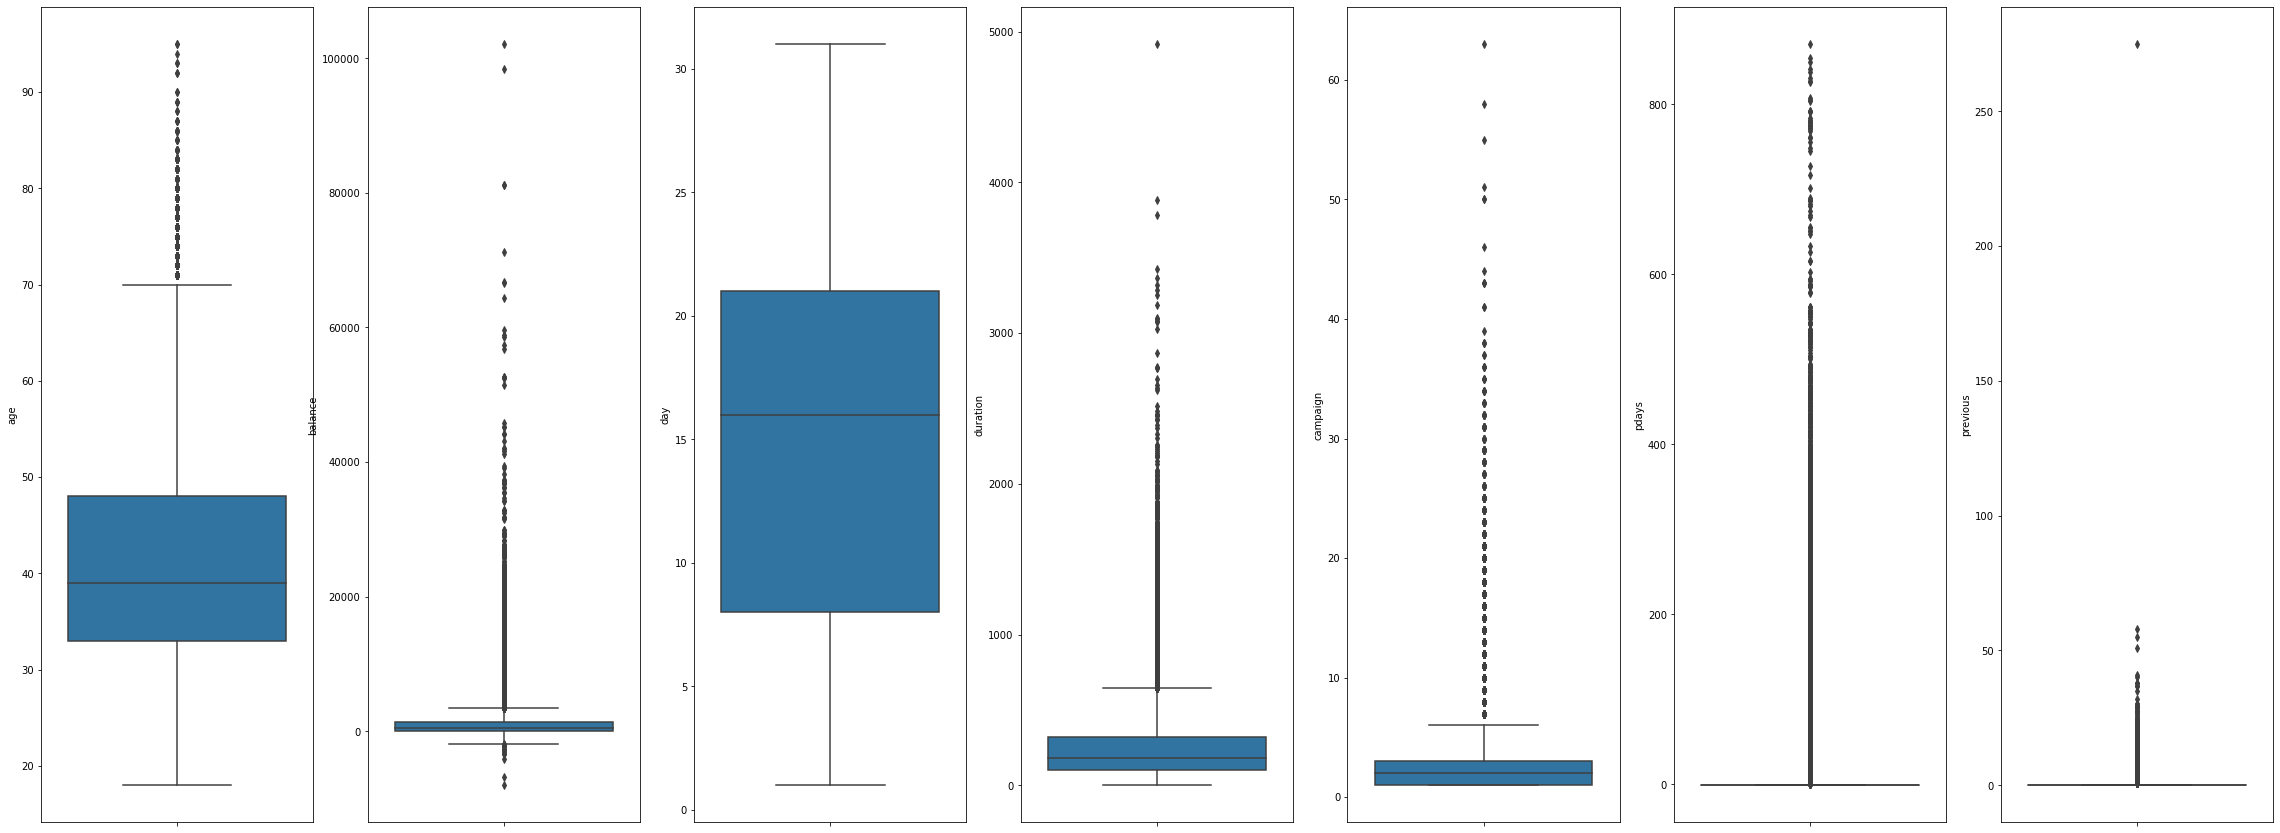

In [228]:
fig, axs = plt.subplots(ncols = len(num_col), figsize = (40, 15))

for idx, field in enumerate(num_col):
    sns.boxplot(y = field, 
                data = data,
                ax = axs[idx])

### 1b. Multivariate analysis - 6 marks
#### Make a function to plot boxplots for all continuous variables VS ‘Target’ variable and countplots for all categorical variables VS ‘Target’ variable? - **3 Marks**

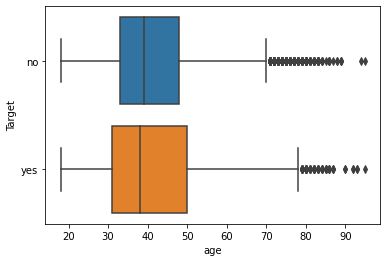

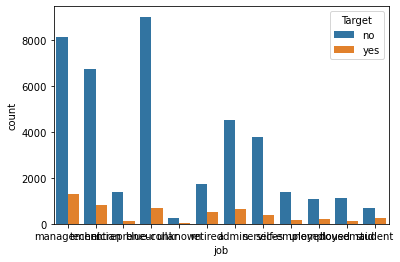

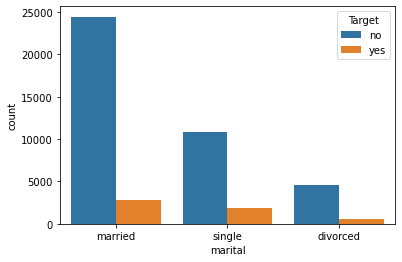

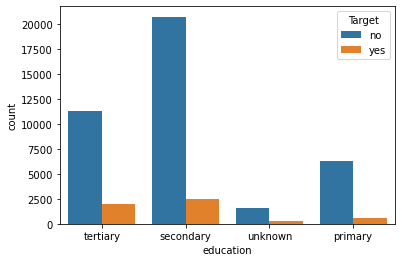

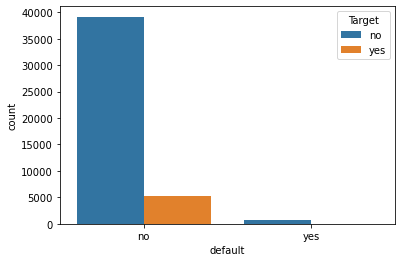

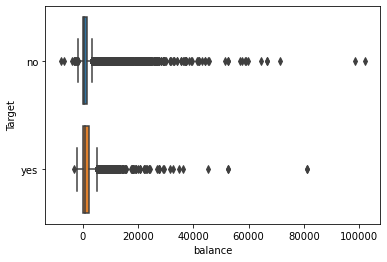

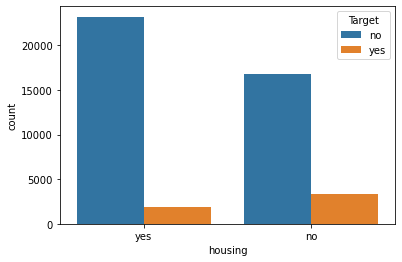

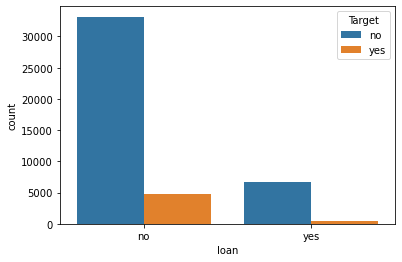

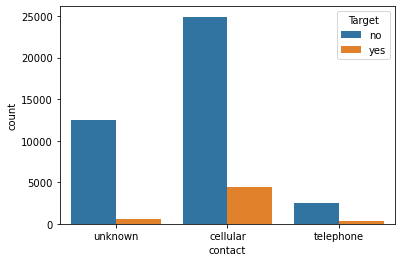

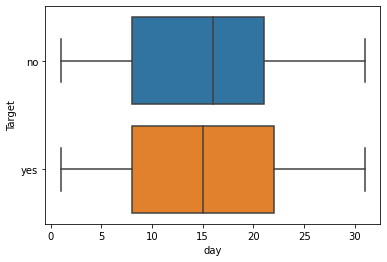

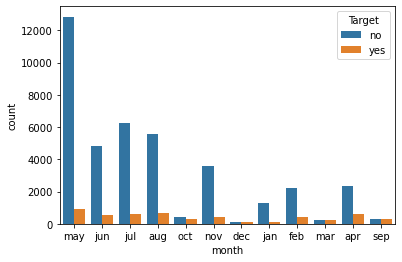

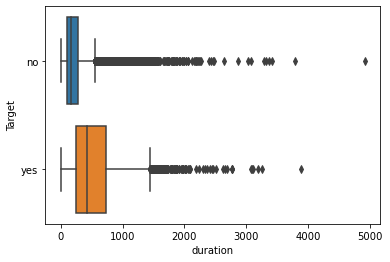

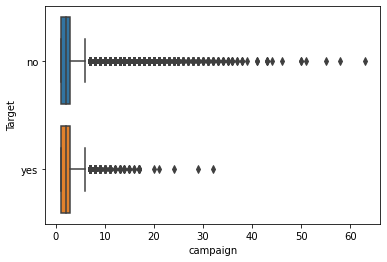

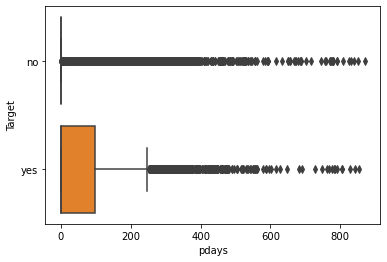

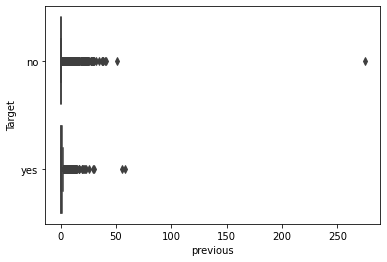

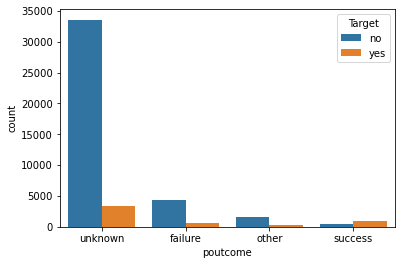

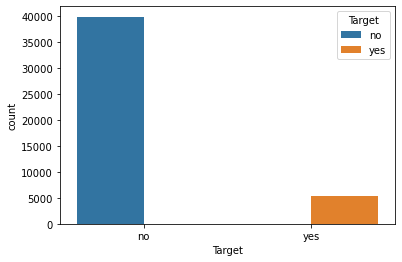

In [244]:
def mvanalysis(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            sns.boxplot(x=df[col],y=df.Target);
            plt.show();
        elif df[col].dtype == 'object':
            sns.countplot(x=df[col], data=df, hue=df.Target);
            plt.show()
            
    
mvanalysis(data)

#### Bi-variate analysis between predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using pair plots, heatmaps, histograms or density curves. - **3 Marks**

In [22]:
data.Target = data.Target.replace(to_replace=['no', 'yes'], value=[0, 1])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


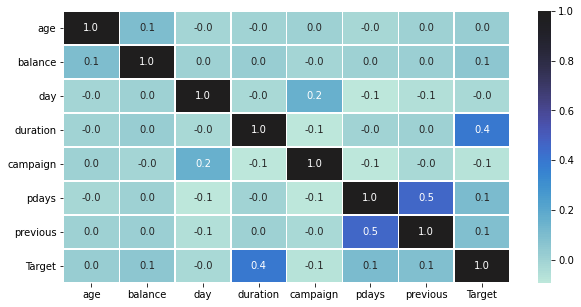

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=.5,fmt = '.1f', center = 1)
plt.show()

### Insight
- Strong positive correlation between Target and duration
- Negative correlation between Target and campaign


## 2. Prepare the data for analytics - 5 marks

#### Label encode or create dummy variables for categorical variables. Give reason for selecting either of them. - **2 Marks**

In [14]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [15]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(data[col].value_counts())
        print()

# job - dummies
# marital - dummies
# education - dummies
# default, housing, loan - binary
# contact - dummies
# month - label encoder
# poutcome - dummies

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype:

In [23]:
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'contact', 'poutcome'])

data.default = data.default.replace(to_replace=['no', 'yes'], value=[0, 1])
data.housing = data.housing.replace(to_replace=['no', 'yes'], value=[0, 1])
data.loan = data.loan.replace(to_replace=['no', 'yes'], value=[0, 1])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['month'] = le.fit_transform(data['month'])
data.head()


,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,8,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,8,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,8,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,8,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,8,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


### Insights

- job - dummies
- marital - dummies
- education - dummies
- default, housing, loan - binary
- contact - dummies
- month - label encoder
- poutcome - dummies

Most columns were transformed using dummy variables as there was no clear natural order within the column. For example for the job columns, one would not start off at unknown or unemployed and progress through housemaid, student, technician and finally land on retired. 

The only column that had a natural order was month. Even so, I was unsure if this was the best fit as I was not sure how to select which was the starting month and which was the ending month. For example, May ended up as 8 when it should have been 5. However, I believe that is relative. The machine learning model would ultimately know that there is at least some order for the months. 

Finally, I decided to directly replace the default, housing, and loan columns into binary counts as those are clear yes/no columns. 

#### Create the training set and test set in a ratio of 70:30. Make sure and verify distribution of classes is the same in the full dataset and train test split data. - **3 Marks**

In [24]:
X = data.drop("Target" , axis=1)
y = data.pop("Target")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=7)

## 3. Create the ensemble model - 30 marks

#### Build the ensemble models (Bagging and Boosting) and Decision Tree model (at least 4 models in total). Note the model performance by using different metrics. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. - **10 Marks**

## 3a. Decision Tree

In [39]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=7)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

1.0
0.8762164553229136


<AxesSubplot:>

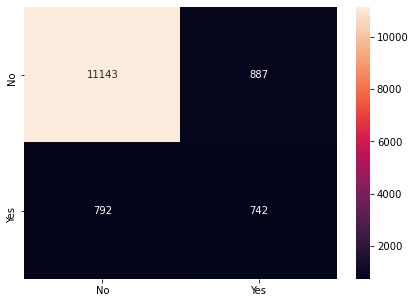

In [46]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))


y_predict = dTree.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



## 3b. Bagging

In [41]:
from sklearn.ensemble import BaggingClassifier

# bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=7)
bgcl = BaggingClassifier(n_estimators=50,random_state=7)

bgcl = bgcl.fit(X_train, y_train)


0.9996524157108099
0.9029784724270127


<AxesSubplot:>

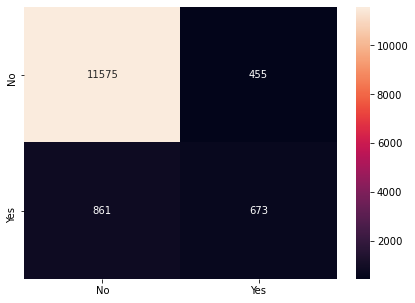

In [47]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_train , y_train))
print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



## 3c. AdaBoosting

In [31]:
from sklearn.ensemble import AdaBoostClassifier
# abcl = AdaBoostClassifier(n_estimators=10, random_state=7)
abcl = AdaBoostClassifier( n_estimators=50,random_state=7)
abcl = abcl.fit(X_train, y_train)


0.8992953518500963
0.9021675022117369


<AxesSubplot:>

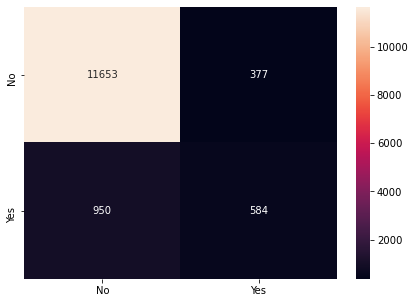

In [48]:
y_predict = abcl.predict(X_test)

print(abcl.score(X_train , y_train))
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



## 3d. GradientBoosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=7)
gbcl = gbcl.fit(X_train, y_train)


0.904888299048883
0.9056325567679151


<AxesSubplot:>

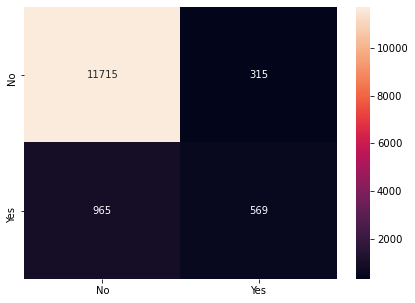

In [49]:
y_predict = gbcl.predict(X_test)

print(gbcl.score(X_train, y_train))
print(gbcl.score(X_test, y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## 3e. RandomForest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=7,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.9996840142825544
0.9060011795930404


<AxesSubplot:>

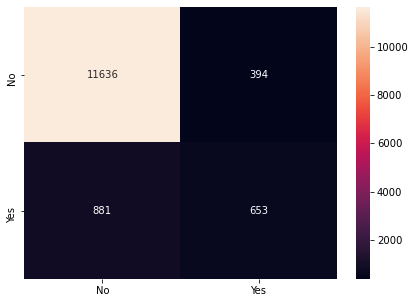

In [50]:
y_predict = rfcl.predict(X_test)

print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#### Also reflect the training and testing score of all the models. Build a dataframe with model names as row index and all the metrics calculated as columns - **5 Marks**

#### Explain the confusion matrix related terms like recall, precision etc. Also, select the best metric to choose one of the models from above. Give your reason for the same. - **5 Marks**

- Recall is total positive divided by total positive plus false negative (TP/TP+FN). It is the sensitivity or true positive rate. 

- Precision is the total positive divded by total positive plus false positive (TP/TP+FP). It measures what the model thought were positives. 

#### Answer the following questions : - **10 Marks**
- What do you mean by recall and what information does it provide here?
   #### - It is the true positivity rate. It indicates what datapoints were actual positive, regardless of what the model thought was positive. 

- Suggest some changes for the organization so that they can increase the number of customers who take term deposit.
    #### - I would suggest the bank increase their outreach to customers. The more they reach out, the more likely those customers are likely to take the term deposit. 
- How much influence does the previous campaign and mode of interaction have on financial performance.
    #### - The previous campaign has a non-zero influence on financial performance that is not totally insignificant. It is something that should be explored by the marketing team. 
- Which features should be more/less focused by the bank to get better results and why?
    #### - I would suggest the bank focus on the general outreach to their customers; they should focus on the duration of the contact, the number of times the customer is contacted, and the balance of the customers' account. 
- What did you learn about banking industries from this data?
    #### - I learned that asumptions can be dangerous to make. Even if these assumptions appear obvious and common sense going in, the individual situation of the organization is key. Ultimately, the data does not lie. It does not mislead or make assumptions for you. It is best to leave one's assumptions at the door. 